In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [322]:
def draw_arc(m, rad, agl_range, nres=500, draw_arrow=False, c='k', lw=1, alpha=1, linestyle='-'):
    
    if draw_arrow:
        wh = 0.8
        wl = 0.6
        
        t0 = 2 * np.arcsin(wh/2/rad)
        am = np.array([m[0] + rad*np.sin(agl_range[1]-t0), m[1] + rad*np.cos(agl_range[1]-t0)])
        ah = np.array([m[0] + rad*np.sin(agl_range[1]),    m[1] + rad*np.cos(agl_range[1])])
        
        dx = ah[0] - am[0]
        dy = am[1] - ah[1]
        phi0 = np.arctan(dy/dx)
        
        p1 = (am[0]-wl/2*np.sin(phi0), am[1]-wl/2*np.cos(phi0))
        p2 = (am[0]+wl/2*np.sin(phi0), am[1]+wl/2*np.cos(phi0))
        
        plt.fill([p1[0], p2[0], ah[0]], [p1[1], p2[1], ah[1]], c=c, alpha=alpha, edgecolor='none')
        
        _ar = [agl_range[0], agl_range[1]-t0]
    else:
        _ar = agl_range
    
    theta = np.linspace(_ar[0], _ar[1], nres)
    x = m[0] + rad * np.sin(theta)
    y = m[1] + rad * np.cos(theta)
    
    plt.plot(x, y, c=c, lw=lw, alpha=alpha, linestyle=linestyle)
    
    
def draw_multi_relation(weight, labels, c='k', alpha=1, ndir=0, L=10, agl0=(20, 45, 70), linestyle='-'):
    assert len(agl0) <= 3
    assert len(agl0) == len(weight)
    assert ndir in [0, 1] # l->r, r->l
    
    # draw node
    plt.scatter([-L/2, L/2], [0, 0], s=800, c=("r", "b"))
    plt.text(-L/2, 0, "F", c='w', ha='center', va='center', fontsize=18, fontstyle='italic')
    plt.text(L/2, 0, "S", c='w', ha='center', va='center', fontsize=18, fontstyle='italic')
    
    agl0 = np.array(agl0) / 180 * np.pi
    w = L/8
    tw = L/8
    for n in range(len(agl0)):
        theta = agl0[n]
        rad = L/2/np.sin(theta)
        m = (0, (-1)**(ndir+1) * L/2/np.tan(theta))        
        agl1 = theta-2*np.arcsin(w/(2*rad))    
        agl2 = np.arcsin(tw/2/rad)
        
        pi0 = np.pi*ndir
        if labels[n] == "":
            # draw_arc(m, rad, [-agl1+pi0, agl1+pi0], lw=weight[n], c=c, alpha=alpha, draw_arrow=True, linestyle=linestyle)
            draw_arc(m, rad, [-agl1+pi0, agl1+pi0], lw=weight[n], c=c, alpha=alpha, linestyle=linestyle)
        else:
            draw_arc(m, rad, [-agl1+pi0, -agl2+pi0], lw=weight[n], c=c, alpha=alpha, linestyle=linestyle)
            draw_arc(m, rad, [agl2+pi0, agl1+pi0], draw_arrow=True, lw=weight[n], c=c, alpha=alpha, linestyle=linestyle)
            plt.text(0, rad*np.cos(agl2+pi0)+m[1], labels[n], c=c, ha='center', va='center', fontsize=15)

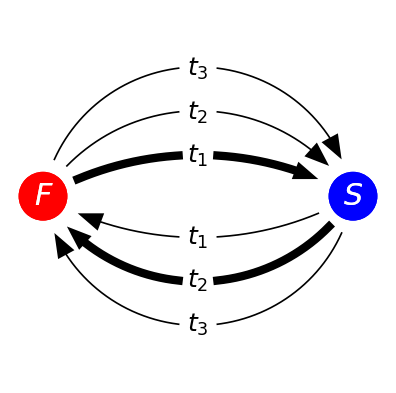

In [323]:
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
draw_multi_relation([5,1,1], (r"$t_1$", r"$t_2$", r"$t_3$"), agl0=(30, 58, 80), ndir=0)
draw_multi_relation([1,5,1], (r"$t_1$", r"$t_2$", r"$t_3$"), agl0=(30, 58, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

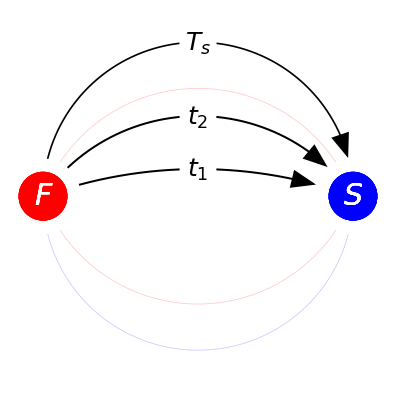

In [349]:
# F(--)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
# draw_multi_relation([1], [""], agl0=[90], ndir=0, alpha=0.5, c='b', linestyle='--')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

# Draw arrow: fase -> slow
draw_multi_relation([1.2, 1.2, 1], (r"$t_1$", r"$t_2$", r"$T_s$"), agl0=(20, 55, 90), ndir=0)

# draw_multi_relation([1.2, 1.2], (r"$t_1$", r"$t_2$"), agl0=(20, 55, 90), ndir=0)

# Draw arrow: slow -> fast
# draw_multi_relation([0.5,0.5,0.5], (r"$t_2$", r"$t_3$'", r"$t_{\alpha}$"), agl0=(40, 60, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

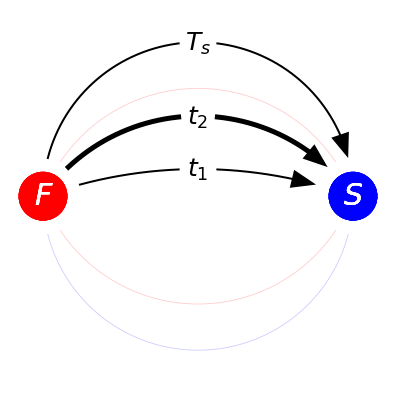

In [324]:
# F(f-)S(--)
fs = 25; ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
# draw_multi_relation([1], [""], agl0=[90], ndir=0, alpha=0.5, c='b', linestyle='--')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

# Draw arrow: fase -> slow
draw_multi_relation([1.2, 3, 1.2], (r"$t_1$", r"$t_2$", r"$T_s$"), agl0=(20, 55, 90), ndir=0)

# Draw arrow: slow -> fast
# draw_multi_relation([0.5,0.5,0.5], (r"$t_2$", r"$t_3$'", r"$t_{\alpha}$"), agl0=(40, 60, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

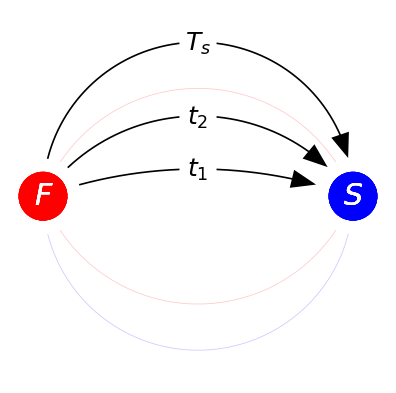

In [325]:
# 1, F(--)S(-s)
fs = 25; ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
# draw_multi_relation([1], [""], agl0=[90], ndir=0, alpha=0.5, c='b', linestyle='--')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

# Draw arrow: fase -> slow
draw_multi_relation([1,1,1], (r"$t_1$", r"$t_2$", r"$T_s$"), agl0=(20, 55, 90), ndir=0)

# Draw arrow: slow -> fast
# draw_multi_relation([0.5,0.5,0.5], (r"$t_2$", r"$t_3$'", r"$t_{\alpha}$"), agl0=(40, 60, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

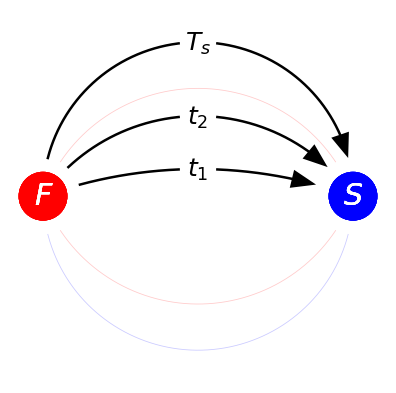

In [326]:
# 1, F(f-)S(-s)
fs = 25; ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
# draw_multi_relation([1], [""], agl0=[90], ndir=0, alpha=0.5, c='b', linestyle='--')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

# Draw arrow: fase -> slow
draw_multi_relation([1.5,1.5,1.5], (r"$t_1$", r"$t_2$", r"$T_s$"), agl0=(20, 55, 90), ndir=0)

# Draw arrow: slow -> fast
# draw_multi_relation([0.5,0.5,0.5], (r"$t_2$", r"$t_3$'", r"$t_{\alpha}$"), agl0=(40, 60, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

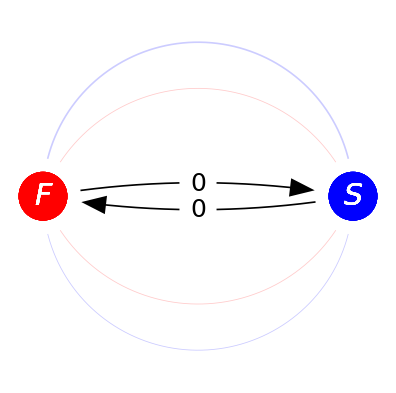

In [353]:
# 2, F(--)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([1], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

# Draw arrow: fase -> slow
draw_multi_relation([1.], ["0"], agl0=[10], ndir=0)
draw_multi_relation([1.], ["0"], agl0=[10], ndir=1)

# draw_multi_relation([1.2, 1.2], (r"$t_1$", r"$t_2$"), agl0=(20, 55, 90), ndir=0)

# Draw arrow: slow -> fast
# draw_multi_relation([0.5,0.5,0.5], (r"$t_2$", r"$t_3$'", r"$t_{\alpha}$"), agl0=(40, 60, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

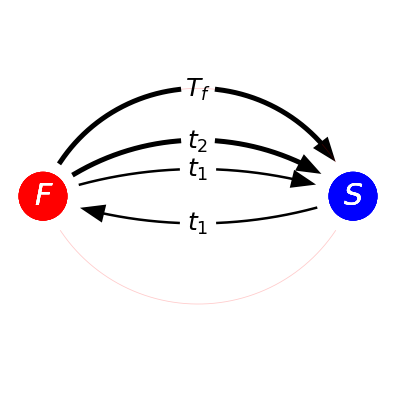

In [327]:
# 2, F(f-)S(--)
ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')

# Draw arrow: fase -> slow
draw_multi_relation([1.5, 3, 3], (r"$t_1$", r"$t_2$", r"$T_f$"), agl0=(20, 40, 70), ndir=0)

# Draw arrow: slow -> fast
draw_multi_relation([1.5], [r"$t_1$"], agl0=[20], ndir=1)
# draw_multi_relation([0.5,0.5,0.5], (r"$t_2$", r"$t_3$'", r"$t_{\alpha}$"), agl0=(40, 60, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

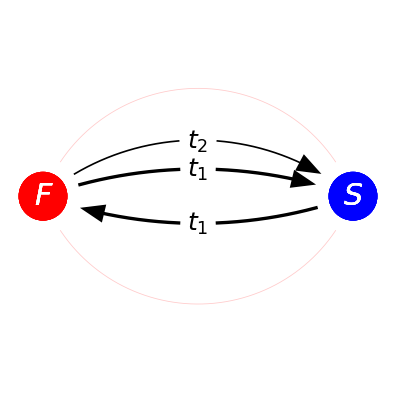

In [328]:
# 2, F(f-)S(f-)
ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')

draw_multi_relation([2, 1], (r"$t_1$", r"$t_2$"), agl0=(20, 40), ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([2], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

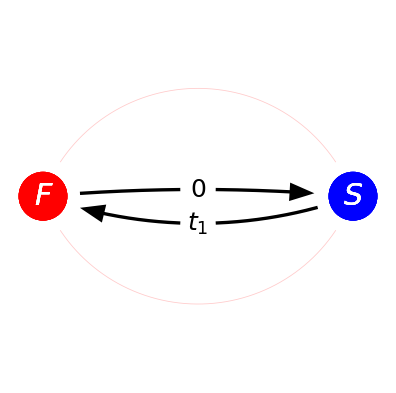

In [329]:
# 2, F(--)S(f-)
ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')

draw_multi_relation([2], [r"$0$"], agl0=[5], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([2], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

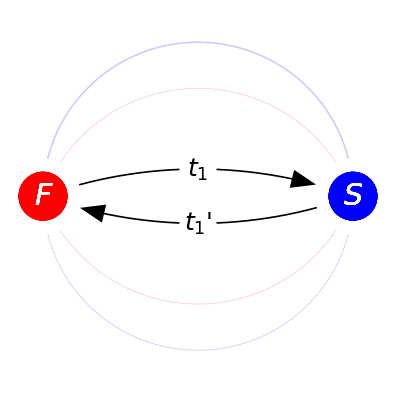

In [355]:
# 3, F(--)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([1], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

# Draw arrow: fase -> slow
draw_multi_relation([1.], [r"$t_1$"], agl0=[20], ndir=0)
draw_multi_relation([1.], [r"$t_1$'"], agl0=[20], ndir=1)

# draw_multi_relation([1.2, 1.2], (r"$t_1$", r"$t_2$"), agl0=(20, 55, 90), ndir=0)

# Draw arrow: slow -> fast
# draw_multi_relation([0.5,0.5,0.5], (r"$t_2$", r"$t_3$'", r"$t_{\alpha}$"), agl0=(40, 60, 80), ndir=1)

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

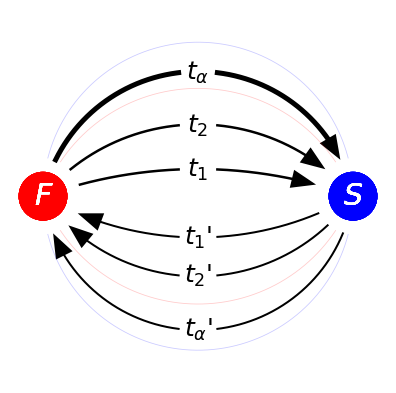

In [330]:
# 3, F(f-)S(--)
ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1.5, 1.5, 3], [r"$t_1$", r"$t_2$", r"$t_{\alpha}$"], agl0=[20, 50, 78], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 82], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

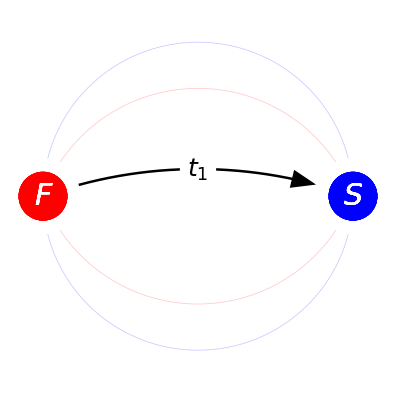

In [331]:
# 3, F(f-)S(-s)
ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1.5], [r"$t_1$"], agl0=[20], ndir=0) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

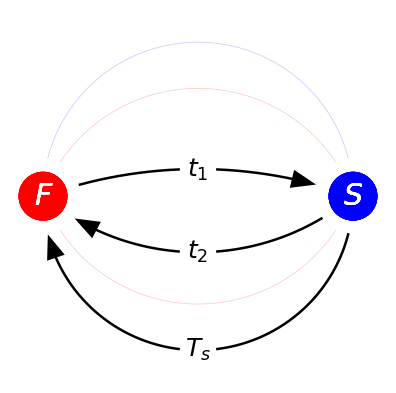

In [332]:
# 3, F(--)S(-s)
ff = 40

plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
# draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1.5], [r"$t_1$"], agl0=[20], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1.5, 1.5], [r"$t_2$", r"$T_s$"], agl0=[40, 90], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

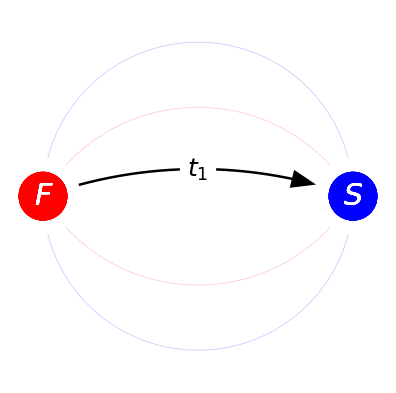

In [358]:
# 4, F(f-)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1.5], [r"$t_1$"], agl0=[20], ndir=0) # Draw arrow: fase -> slow
# draw_multi_relation([1.5], [r"$t_{\alpha}$"], agl0=[75], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

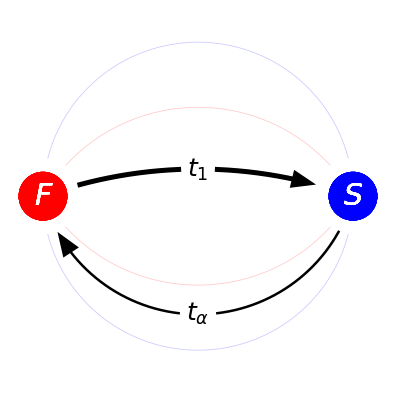

In [333]:
# 4, F(f-)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([3], [r"$t_1$"], agl0=[20], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1.5], [r"$t_{\alpha}$"], agl0=[75], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

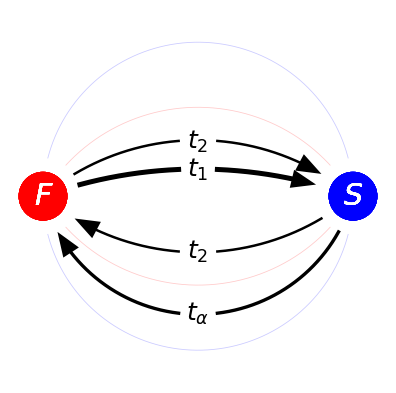

In [334]:
# 4, F(-s)S(-s)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([3, 1.5], [r"$t_1$", r"$t_2$"], agl0=[20, 40], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1.5, 2], [r"$t_2$", r"$t_{\alpha}$"], agl0=[40, 75], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

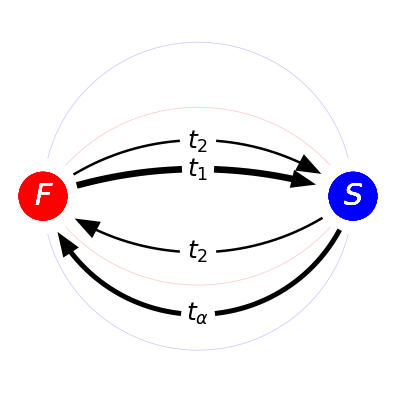

In [335]:
# 4, F(fs)S(-s)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([4, 1.5], [r"$t_1$", r"$t_2$"], agl0=[20, 40], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1.5, 3], [r"$t_2$", r"$t_{\alpha}$"], agl0=[40, 75], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

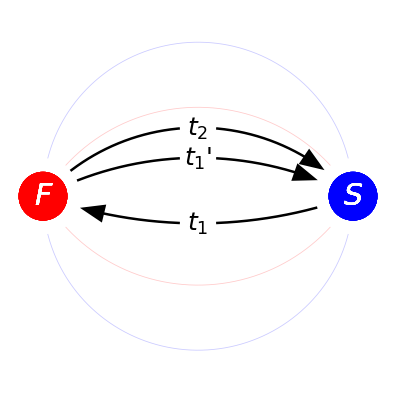

In [362]:
# 5, F(f-)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1.5, 1.5], [r"$t_1$'", r"$t_2$"], agl0=[28, 48], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1.5], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.5], [r"$t_{\alpha}$"], agl0=[75], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

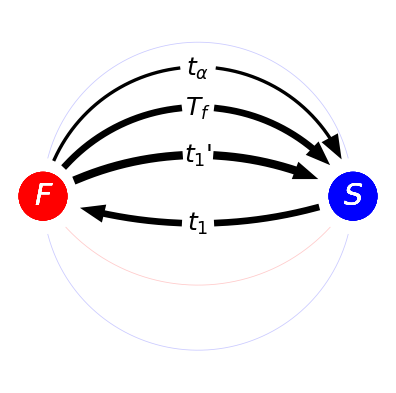

In [336]:
# 5, F(f-)S(f-)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
# draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([5, 4, 2], [r"$t_1$'", r"$T_f$", r"$t_{\alpha}$"], agl0=[30, 60, 80], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([4], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

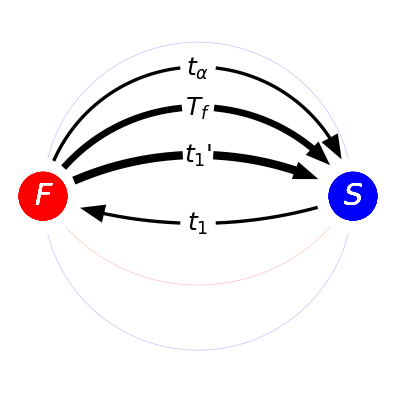

In [337]:
# 5, F(f-)S(fs)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
# draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([5, 4, 2], [r"$t_1$'", r"$T_f$", r"$t_{\alpha}$"], agl0=[30, 60, 80], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([2], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

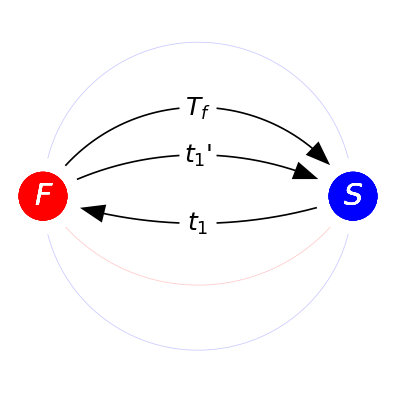

In [363]:
# 5, F(--)S(-s)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
# draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1, 1], [r"$t_1$'", r"$T_f$"], agl0=[30, 60], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

In [ ]:
# 6, F(--)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1.5, 1.5], [r"$t_1$'", r"$t_2$"], agl0=[28, 48], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1.5], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.5], [r"$t_{\alpha}$"], agl0=[75], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

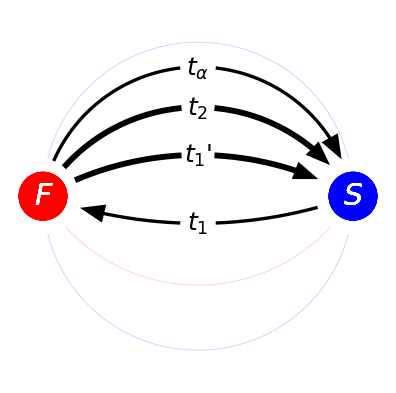

In [339]:
# 6, F(f-)S(f-)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
# draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([3.5, 3.5, 2], [r"$t_1$'", r"$t_2$", r"$t_{\alpha}$"], agl0=[30, 60, 80], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([2], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

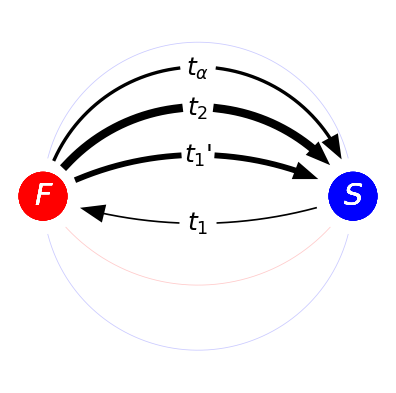

In [340]:
# 6, F(f-)S(fs)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
# draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([3.5, 5, 2], [r"$t_1$'", r"$t_2$", r"$t_{\alpha}$"], agl0=[30, 60, 80], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

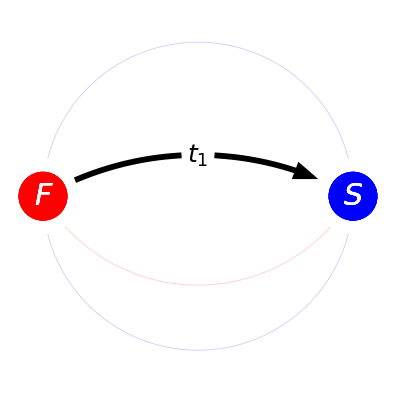

In [341]:
# 6, F(--)S(-s)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
# draw_multi_relation([0.5], [""], agl0=[60], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[60], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([3.5], [r"$t_1$"], agl0=[30], ndir=0) # Draw arrow: fase -> slow
# draw_multi_relation([1], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

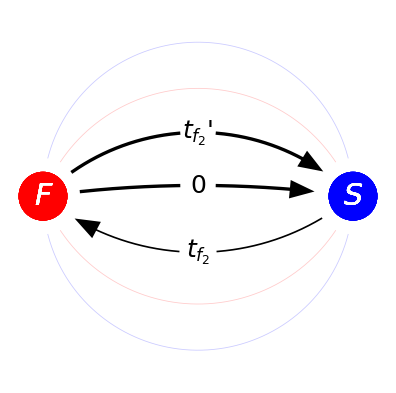

In [366]:
# 7, F(f-)S(f-)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([2, 2], [r"$0$", r"$t_{f_2}$'"], agl0=[8, 45], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([1], [r"$t_{f_2}$"], agl0=[40], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

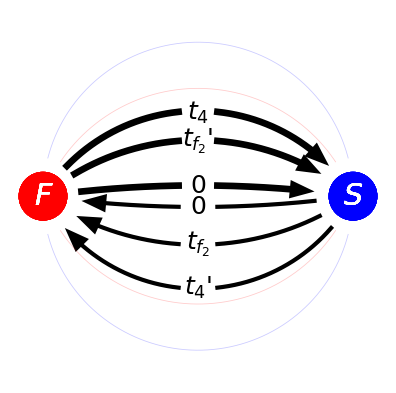

In [342]:
# 7, F(f-)S(f-)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([4, 4, 4], [r"$0$", r"$t_{f_2}$'", r"$t_4$", ], agl0=[8, 40, 58], ndir=0) # Draw arrow: fase -> slow
draw_multi_relation([2.5, 2.5, 2.5], [r"$0$", r"$t_{f_2}$", r"$t_4$'", ], agl0=[8, 35, 62], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

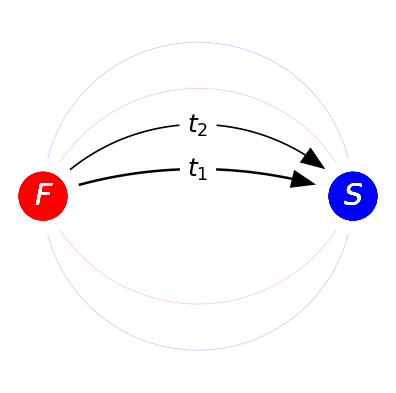

In [368]:
# 8, F(f-)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([1.5, 1], [r"$t_1$", r"$t_{2}$"], agl0=[20, 50], ndir=0) # Draw arrow: fase -> slow 
# S->F 무시해도 되나? 좀 큰데? 특히, t_{\alpha}
# draw_multi_relation([1], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

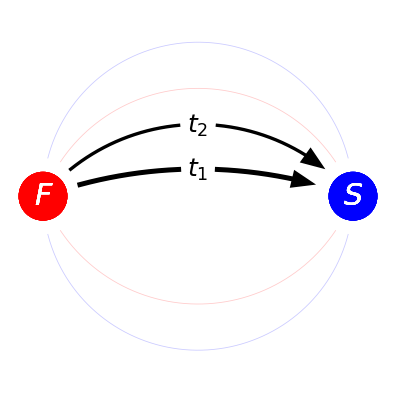

In [343]:
# 8, F(f-)S(--)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([3, 2], [r"$t_1$", r"$t_{2}$"], agl0=[20, 50], ndir=0) # Draw arrow: fase -> slow 
# S->F 무시해도 되나? 좀 큰데? 특히, t_{\alpha}
# draw_multi_relation([1], [r"$t_1$"], agl0=[20], ndir=1) # Draw arrow: fase -> slow
# draw_multi_relation([1.2, 1.2, 1.2], [r"$t_1$'", r"$t_2$'", r"$t_{\alpha}$'"], agl0=[30, 55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

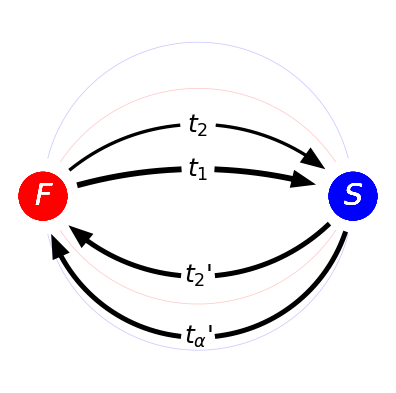

In [344]:
# 8, F(-s)S(fs)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([3.5, 2], [r"$t_1$", r"$t_{2}$"], agl0=[20, 50], ndir=0) # Draw arrow: fase -> slow 
draw_multi_relation([3, 3], [r"$t_2$'", r"$t_{\alpha}$'"], agl0=[55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()

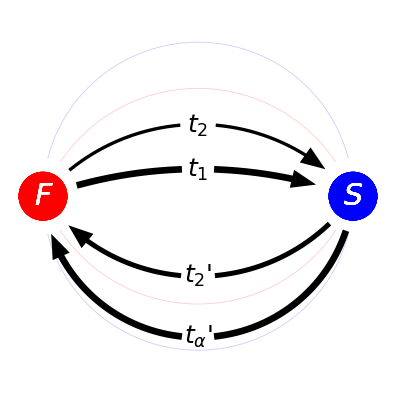

In [345]:
# 8, F(fs)S(fs)
plt.figure(figsize=(4, 4), facecolor='none', dpi=120)
# fast & slow
draw_multi_relation([0.5], [""], agl0=[70], ndir=0, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([.5], [""], agl0=[70], ndir=1, alpha=0.2, c='r', linestyle='-')
draw_multi_relation([0.5], [""], agl0=[90], ndir=0, alpha=0.2, c='b', linestyle='-')
draw_multi_relation([.5], [""], agl0=[90], ndir=1, alpha=0.2, c='b', linestyle='-')

draw_multi_relation([4, 2], [r"$t_1$", r"$t_{2}$"], agl0=[20, 50], ndir=0) # Draw arrow: fase -> slow 
draw_multi_relation([3, 4], [r"$t_2$'", r"$t_{\alpha}$'"], agl0=[55, 85], ndir=1) # Draw arrow: slow -> fast

plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.axis("off")

plt.show()